In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [5]:
# Load data from input file
X = np.loadtxt('9_data_quality.txt', delimiter=',')

In [6]:
X

array([[ 3.23,  1.74],
       [ 0.95,  4.31],
       [ 3.11,  7.28],
       [ 6.55,  1.43],
       [ 8.41,  2.98],
       [ 7.52,  7.22],
       [ 3.17,  2.87],
       [ 2.07,  4.11],
       [ 3.44,  7.43],
       [ 7.44,  1.16],
       [ 8.18,  4.06],
       [ 6.55,  8.52],
       [ 2.46,  1.61],
       [ 2.41,  4.73],
       [ 3.23,  6.36],
       [ 6.74,  2.13],
       [ 8.98,  4.54],
       [ 7.39,  7.28],
       [ 2.08,  1.7 ],
       [ 1.76,  5.43],
       [ 4.03,  7.64],
       [ 7.  ,  3.13],
       [ 9.57,  3.76],
       [ 7.15,  8.35],
       [ 3.17,  2.42],
       [ 0.96,  3.74],
       [ 3.27,  7.83],
       [ 6.12,  1.19],
       [ 9.06,  4.79],
       [ 6.59,  6.94],
       [ 2.47,  1.7 ],
       [ 1.49,  5.32],
       [ 2.92,  7.02],
       [ 8.53,  2.24],
       [ 7.92,  4.5 ],
       [ 6.64,  8.01],
       [ 3.47,  1.66],
       [ 0.55,  3.6 ],
       [ 2.59,  7.85],
       [ 6.92,  1.13],
       [ 9.64,  4.88],
       [ 8.5 ,  7.91],
       [ 3.28,  2.37],
       [ 1.

([], [])

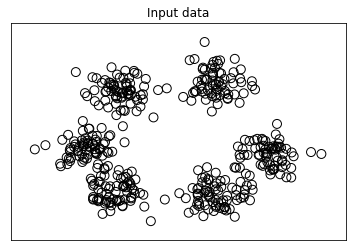

In [7]:
# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [8]:
# Initialize variables
scores = []
values = np.arange(2, 10)

In [9]:
# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.47762624870454473

Number of clusters = 3
Silhouette score = 0.5471742411734871

Number of clusters = 4
Silhouette score = 0.579480188968759

Number of clusters = 5
Silhouette score = 0.5890032635647954

Number of clusters = 6
Silhouette score = 0.6096904118954452

Number of clusters = 7
Silhouette score = 0.5521727463112627

Number of clusters = 8
Silhouette score = 0.4930010271818545

Number of clusters = 9
Silhouette score = 0.44661455667156114



Optimal number of clusters = 6


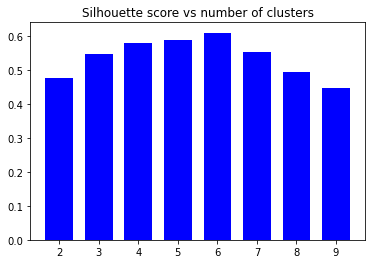

In [10]:
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

C:\Users\nudan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


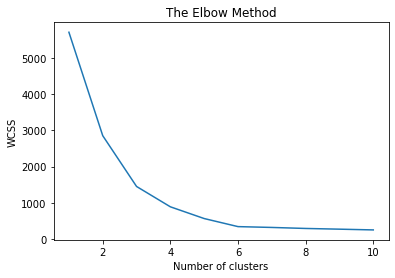

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()